# Problems we want to solve:

Predicting Sales using regression, finding which variables contribute the most and which regression algorithms works the best

Time Series Forecasting: Predict future sales based on historical data.

Classification: Predict the order status (e.g., 'Shipped', 'Cancelled') based on other features.

Clustering: Group customers based on their purchasing behavior.

# Importing in necessary libraries

In [1]:
#Data Handling and Analysis:
import pandas as pd
import numpy as np


#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


#Time Series Forecasting
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

#Classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#Data Preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler

#Evaluation
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, roc_auc_score


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read in the Sales Data Set

In [3]:
# Read the CSV file
sales_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sales Data Analysis/sales_data_sample.csv', encoding="ISO-8859-1")
sales_data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [4]:
sales_data.tail()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small
2822,10414,47,65.52,9,3079.44,5/6/2005 0:00,On Hold,2,5,2005,...,8616 Spinnaker Dr.,NaN,Boston,MA,51003,USA,NaN,Yoshido,Juri,Medium


# Data Exploration

In [5]:
# Display shape, data types, and basic statistics
print("Shape of the dataset:", sales_data.shape)
print("\nData Types:\n", sales_data.dtypes)
print("\nBasic Statistics:\n", sales_data.describe(include="all"))

Shape of the dataset: (2823, 25)

Data Types:
 ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

Basic Statistics:
          ORDERNUMBER  QUANTITYORDERED    PRICEEACH  ORDERLINENUMBER  \
count    2823.000000      2823.000000  2823.000000      2823.000000   
unique           NaN              NaN          NaN              NaN   
top   

In [6]:
#check for missing values
missing_values = sales_data.isnull().sum()
print("\nMissing Values by Column:\n", missing_values)



Missing Values by Column:
 ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64


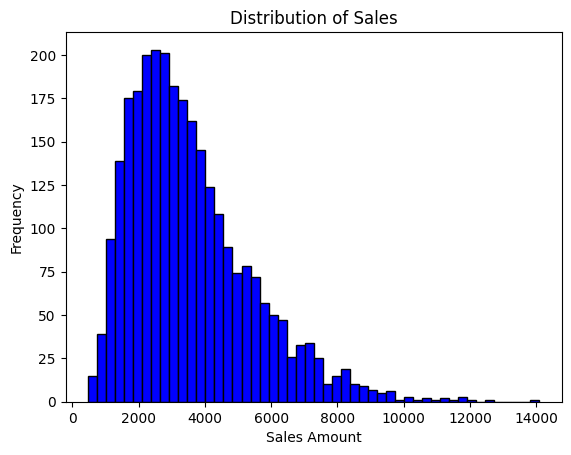

In [7]:
# Example: Histogram for 'SALES' column
plt.hist(sales_data['SALES'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Sales')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.show()


a large number of transactions have relatively small amounts

The distribution of sales is right-skewed, with the majority of transactions having lower sales values and fewer transactions with higher sales values. This indicates that while most sales transactions are of smaller amounts, there are occasional sales of higher values.



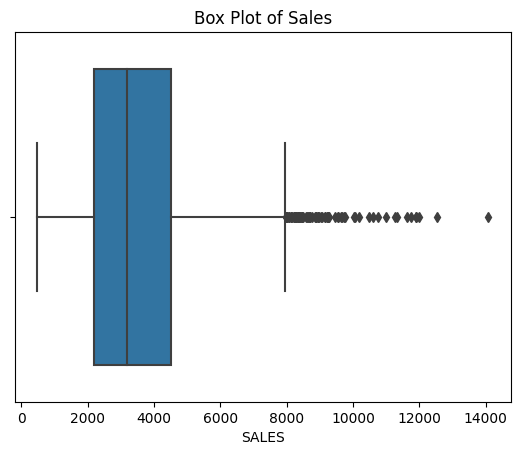

In [8]:
#Check for Outliers:
# Example: Box plot for 'SALES' column
sns.boxplot(x=sales_data['SALES'])
plt.title('Box Plot of Sales')
plt.show()

Most sales values fall within a typical range, there are some sales transactions with values significantly higher than the majority. These could be due to bulk orders, high-valued products, or special deals.

<ipython-input-9-ce0be39d7824>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = sales_data.corr()


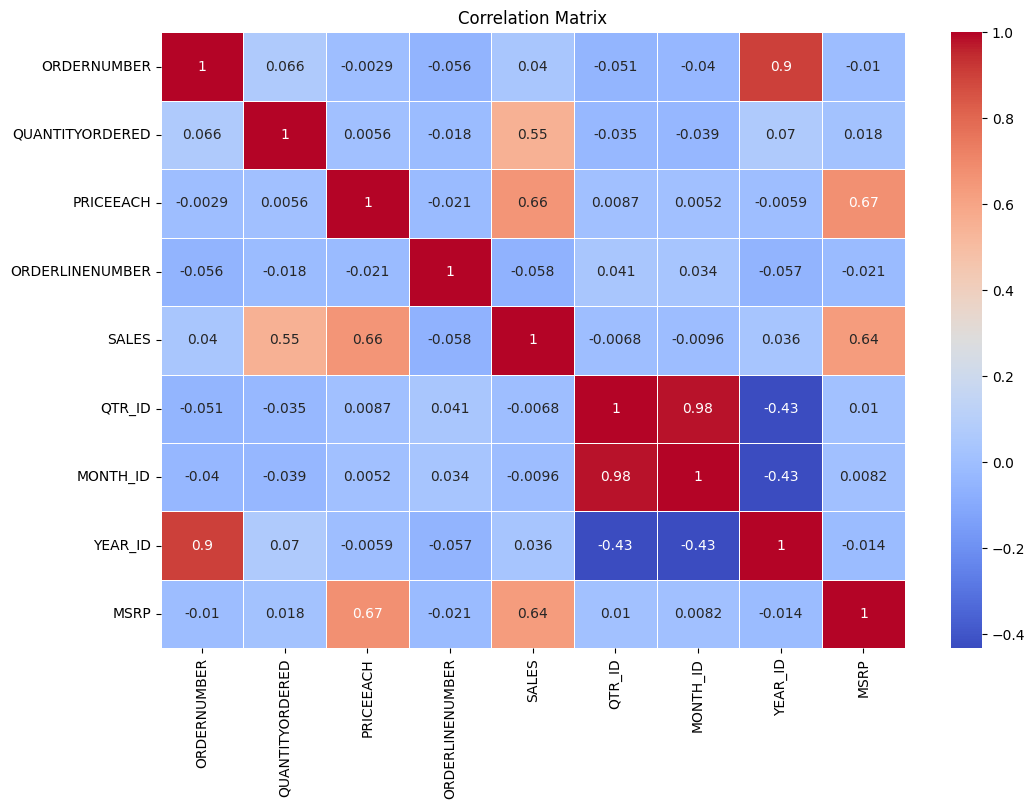

In [9]:
#Check for correlation
correlation_matrix = sales_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Strong Positive Correlations:

QUANTITYORDERED and SALES: As the quantity of items ordered increases, the total sales amount also increases, which is expected.

PRICEEACH and MSRP: The price of each item has a strong correlation with its manufacturer's suggested retail price (MSRP). This suggests that the selling price is often closely related to the MSRP.

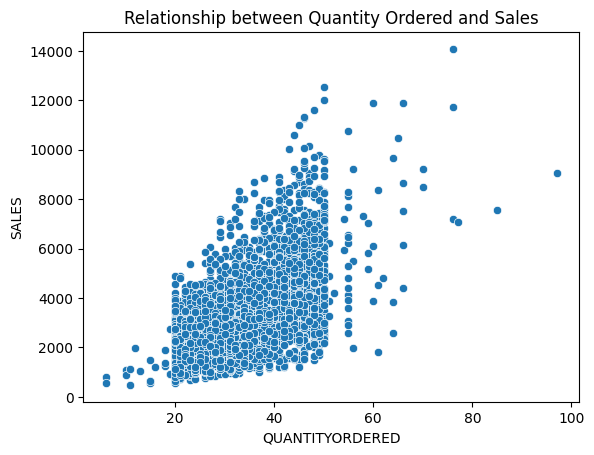

In [10]:
 # Relationship between QUANTITYORDERED and SALES:
sns.scatterplot(x='QUANTITYORDERED', y='SALES', data=sales_data)
plt.title('Relationship between Quantity Ordered and Sales')
plt.show()


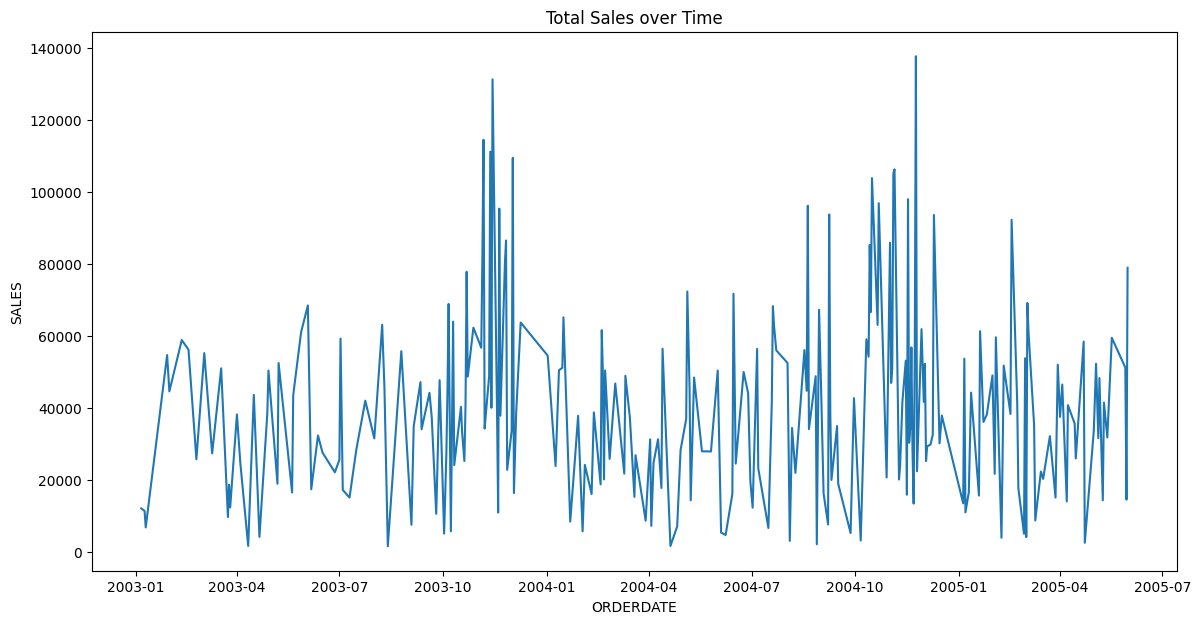

In [11]:
#Time-based Patterns:
#Given that we have an ORDERDATE column, we can explore how sales have evolved over time.
sales_data['ORDERDATE'] = pd.to_datetime(sales_data['ORDERDATE'])
sales_over_time = sales_data.groupby('ORDERDATE')['SALES'].sum().reset_index()
plt.figure(figsize=(14, 7))
sns.lineplot(x='ORDERDATE', y='SALES', data=sales_over_time)
plt.title('Total Sales over Time')
plt.show()


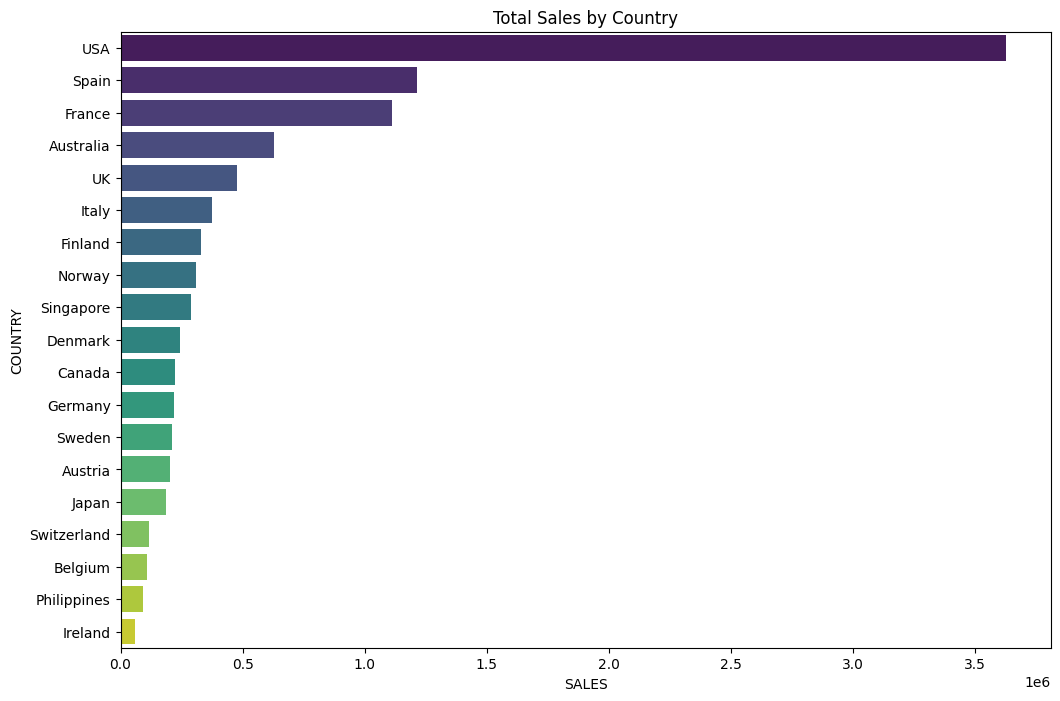

In [12]:
# Analyzing Sales by Country:
sales_by_country = sales_data.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='SALES', y='COUNTRY', data=sales_by_country, palette='viridis')
plt.title('Total Sales by Country')
plt.show()


Relationship between Quantity Ordered and Sales: a clear positive relationship between the quantity of items ordered and the total sales amount. This is expected, as ordering more items would generally result in higher sales values. There are some instances where even a high quantity ordered has a relatively lower total sales, suggesting discounted or lower-priced items.

Total Sales over Time: The line chart depicts the evolution of sales over time. We observe some seasonality in the sales data, with certain periods (possibly months or quarters) consistently showing peaks. This could be due to seasonal promotions, holidays, or other factors affecting consumer buying behavior.

Total Sales by Country: The bar chart showcases sales distribution across countries. The USA, Spain, and France are the top three countries in terms of sales, suggesting significant market shares in these regions

# Data Cleaning

In [13]:
sales_data_filtered = sales_data

In [14]:
# Handle Missing Values
# In Data exploration we identify 4 columns with missing values: ADDRESSLINE2, STATE, POSTALCODE, TERRITORY
sales_data_filtered['ADDRESSLINE2'].fillna('Not Provided', inplace=True)
sales_data_filtered['STATE'].fillna('Unknown', inplace=True)
sales_data_filtered['POSTALCODE'].fillna('Unknown', inplace=True)
sales_data_filtered['TERRITORY'].fillna('Unknown', inplace=True)

In [15]:
#remove duplicate rows

initial_rows = sales_data_filtered.shape[0]
sales_data_filtered.drop_duplicates(inplace=True)
removed_rows = initial_rows - sales_data_filtered.shape[0]

removed_rows

0

seems that there are no duplicate rows

In [16]:
#convert the ORDERDATE column to a datetime format
sales_data_filtered['ORDERDATE'] = pd.to_datetime(sales_data_filtered['ORDERDATE'])


In [17]:
#Handle Outliers
# Calculate IQR for 'SALES' column
Q1 = sales_data_filtered['SALES'].quantile(0.25)
Q3 = sales_data_filtered['SALES'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
sales_data_filtered = sales_data_filtered[(sales_data_filtered['SALES'] >= lower_bound) & (sales_data_filtered['SALES'] <= upper_bound)]


In [18]:
#Standardize Values
# Standardize values in 'COUNTRY' column (hypothetical example)
sales_data_filtered['COUNTRY'] = sales_data_filtered['COUNTRY'].replace({
    'U.S.A.': 'USA',
    'United States': 'USA'
})


<ipython-input-18-42626729a050>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_filtered['COUNTRY'] = sales_data_filtered['COUNTRY'].replace({


# Feature Engineering

In [19]:
#Time-based Features:
#Given that we have an ORDERDATE column, we can derive several features based on time:
sales_data_filtered['Year'] = sales_data_filtered['ORDERDATE'].dt.year
sales_data_filtered['Month'] = sales_data_filtered['ORDERDATE'].dt.month
sales_data_filtered['Day'] = sales_data_filtered['ORDERDATE'].dt.day
sales_data_filtered['Weekday'] = sales_data_filtered['ORDERDATE'].dt.weekday
sales_data_filtered['Is_Weekend'] = sales_data_filtered['Weekday'].apply(lambda x: 1 if x >= 5 else 0)

<ipython-input-19-cdfcf909a8a1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_filtered['Year'] = sales_data_filtered['ORDERDATE'].dt.year
<ipython-input-19-cdfcf909a8a1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_filtered['Month'] = sales_data_filtered['ORDERDATE'].dt.month
<ipython-input-19-cdfcf909a8a1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [20]:
# 2. Product Price Range
# Low, Medium, High
price_thresholds = [sales_data_filtered['PRICEEACH'].quantile(0.25),
                   sales_data_filtered['PRICEEACH'].quantile(0.75)]

def price_range(price):
    if price <= price_thresholds[0]:
        return 'Low'
    elif price <= price_thresholds[1]:
        return 'Medium'
    else:
        return 'High'

sales_data_filtered['Price_Range'] = sales_data_filtered['PRICEEACH'].apply(price_range)

<ipython-input-20-fb5a77f3182d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_filtered['Price_Range'] = sales_data_filtered['PRICEEACH'].apply(price_range)


In [21]:
# Total Order Value
sales_data_filtered['Total_Order_Value'] = sales_data_filtered['QUANTITYORDERED'] * sales_data_filtered['PRICEEACH']

# Product Popularity
product_popularity = sales_data_filtered['PRODUCTCODE'].value_counts().to_dict()
sales_data_filtered['Product_Popularity'] = sales_data_filtered['PRODUCTCODE'].map(product_popularity)

# Display first few rows to verify the new features
sales_data_filtered.head()

<ipython-input-21-81d1ac38fbd7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_filtered['Total_Order_Value'] = sales_data_filtered['QUANTITYORDERED'] * sales_data_filtered['PRICEEACH']
<ipython-input-21-81d1ac38fbd7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_filtered['Product_Popularity'] = sales_data_filtered['PRODUCTCODE'].map(product_popularity)


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,CONTACTFIRSTNAME,DEALSIZE,Year,Month,Day,Weekday,Is_Weekend,Price_Range,Total_Order_Value,Product_Popularity
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,Kwai,Small,2003,2,24,0,0,Medium,2871.00,26
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,Paul,Small,2003,5,7,2,0,Medium,2765.90,26
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,Daniel,Medium,2003,7,1,1,0,Medium,3884.34,26
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,Julie,Medium,2003,8,25,0,0,Medium,3746.70,26
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,Julie,Medium,2003,10,10,4,0,Medium,4900.00,26


# Some Data Visualization

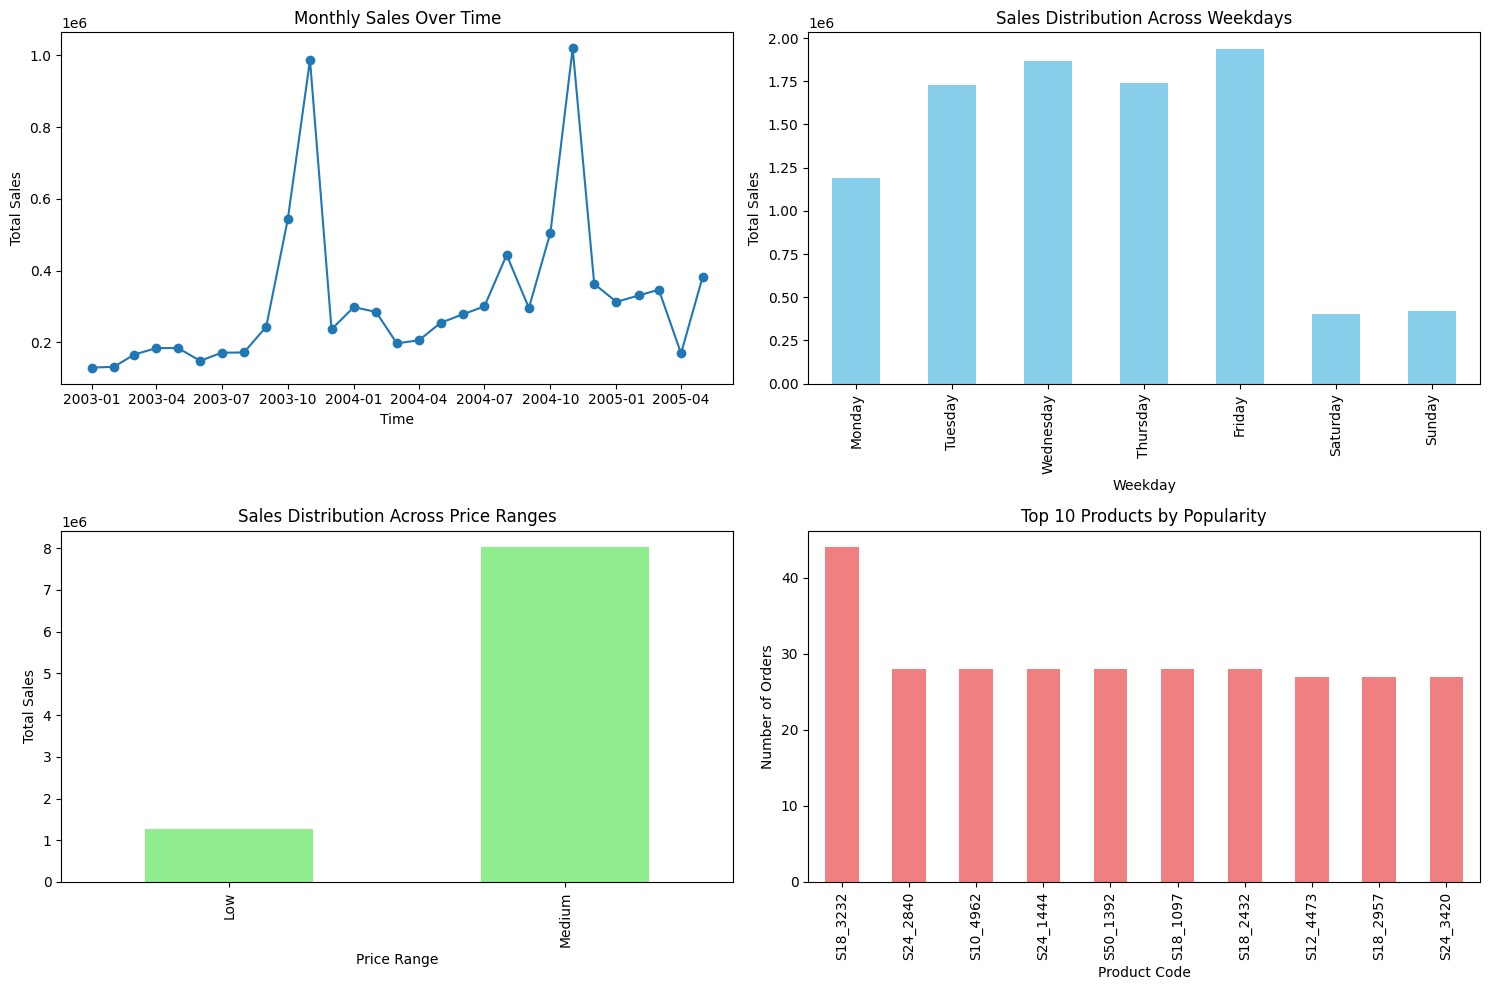

In [22]:
plt.figure(figsize=(15, 10))

# 1. Sales Trends over Time
# Monthly sales over the years
plt.subplot(2, 2, 1)
monthly_sales = sales_data_filtered.groupby(['Year', 'Month'])['SALES'].sum().reset_index()
monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(Day=1))
plt.plot(monthly_sales['Date'], monthly_sales['SALES'], marker='o', linestyle='-')
plt.title('Monthly Sales Over Time')
plt.xlabel('Time')
plt.ylabel('Total Sales')

# Sales distribution across weekdays
plt.subplot(2, 2, 2)
weekday_sales = sales_data_filtered.groupby('Weekday')['SALES'].sum()
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_sales.index = weekday_labels
weekday_sales.plot(kind='bar', color='skyblue')
plt.title('Sales Distribution Across Weekdays')
plt.xlabel('Weekday')
plt.ylabel('Total Sales')

# 2. Sales Distribution across Price Ranges
plt.subplot(2, 2, 3)
price_range_sales = sales_data_filtered.groupby('Price_Range')['SALES'].sum()
price_range_sales.plot(kind='bar', color='lightgreen')
plt.title('Sales Distribution Across Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Total Sales')

# 3. Top 10 Products by Popularity
plt.subplot(2, 2, 4)
top_products = sales_data_filtered['PRODUCTCODE'].value_counts().head(10)
top_products.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Products by Popularity')
plt.xlabel('Product Code')
plt.ylabel('Number of Orders')

plt.tight_layout()
plt.show()


The first plot shows monthly sales over the years. This shows that sales are the highest during holiday seasons

The second plot presents sales distribution across weekdays, providing insights into which days have the highest sales in this case it is weekdays and sales lowest during weekends

The Last plot showcases the top 10 products based on the number of orders. This can identify the most popular products in the dataset


<ipython-input-23-fa77a7e9594e>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  status_sales = sales_data_filtered.groupby(['STATUS']).sum()['SALES']


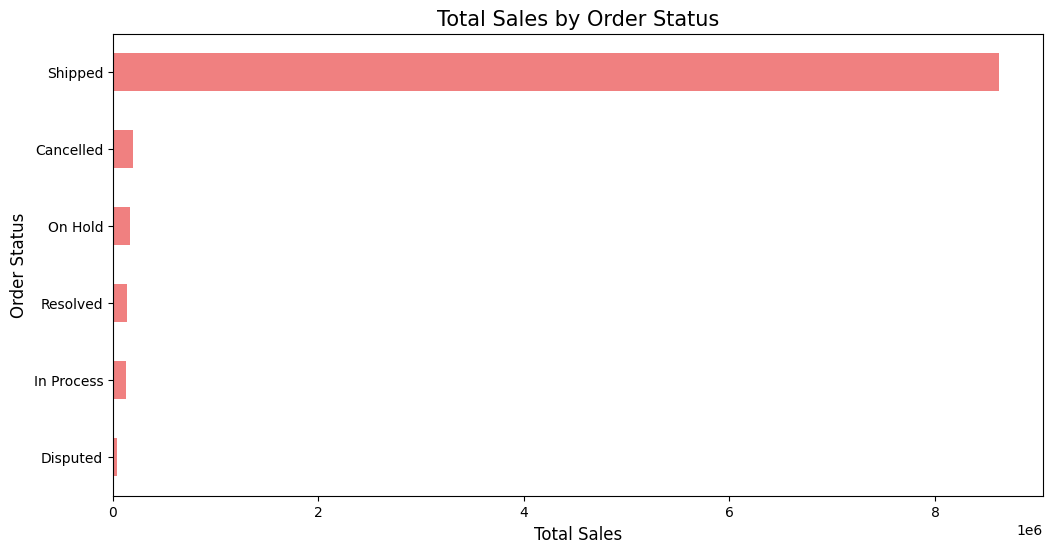

In [23]:
# Sales Distribution by Status
plt.figure(figsize=(12, 6))
status_sales = sales_data_filtered.groupby(['STATUS']).sum()['SALES']
status_sales.sort_values().plot(kind='barh', color='lightcoral')
plt.title('Total Sales by Order Status', fontsize=15)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Order Status', fontsize=12)
plt.show()


Shipped Orders: As expected, the "Shipped" status has the highest sales, indicating that most orders were successfully processed and shipped.
Other Statuses: There are smaller contributions from other statuses like "On Hold", "In Process", and "Cancelled". It might be beneficial to investigate the reasons behind orders with these statuses to potentially reduce cancellations and delays.

<ipython-input-24-12e566355238>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  deal_size_sales = sales_data_filtered.groupby(['DEALSIZE']).sum()['SALES']


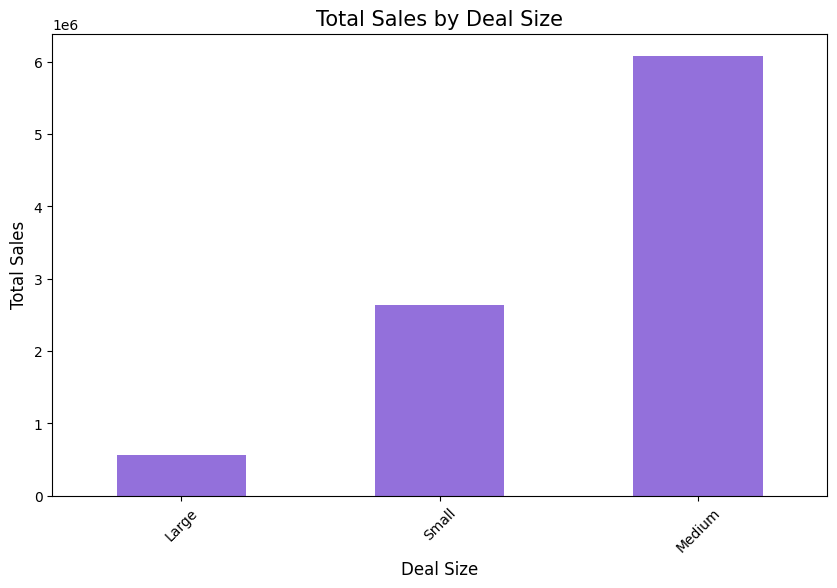

In [24]:
# Total Sales by Deal Size
plt.figure(figsize=(10, 6))
deal_size_sales = sales_data_filtered.groupby(['DEALSIZE']).sum()['SALES']
deal_size_sales.sort_values().plot(kind='bar', color='mediumpurple')
plt.title('Total Sales by Deal Size', fontsize=15)
plt.xlabel('Deal Size', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.show()


# Predicting Sales using regression.

1.   Data Preprocessing: Prepare the data for regression analysis. This involves handling missing values, encoding categorical variables, and splitting the dataset into training and testing sets.
2.   Feature Selection: Identify which features contribute the most to predicting sales.
3.   Model Building and Evaluation: Implement various regression algorithms, train them on the dataset, and evaluate their performance.
4.   Model Comparison: Compare the performance of the various regression models to identify the best one.



Data Preprocessing

In [25]:
# Drop columns that are not necessary or may cause data leakage
cols_to_drop = ['ORDERNUMBER', 'ORDERDATE', 'SALES', 'Total_Order_Value']
data_for_regression = sales_data_filtered.drop(columns=cols_to_drop)

# Encode categorical columns
label_encoders = {}
categorical_columns = data_for_regression.select_dtypes(include=['object']).columns

for col in categorical_columns:
    le = LabelEncoder()
    data_for_regression[col] = le.fit_transform(data_for_regression[col])
    label_encoders[col] = le

# Splitting the dataset into training and testing sets
X = data_for_regression
y = sales_data_filtered['SALES']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape


((2193, 29), (549, 29))

Feature Selection

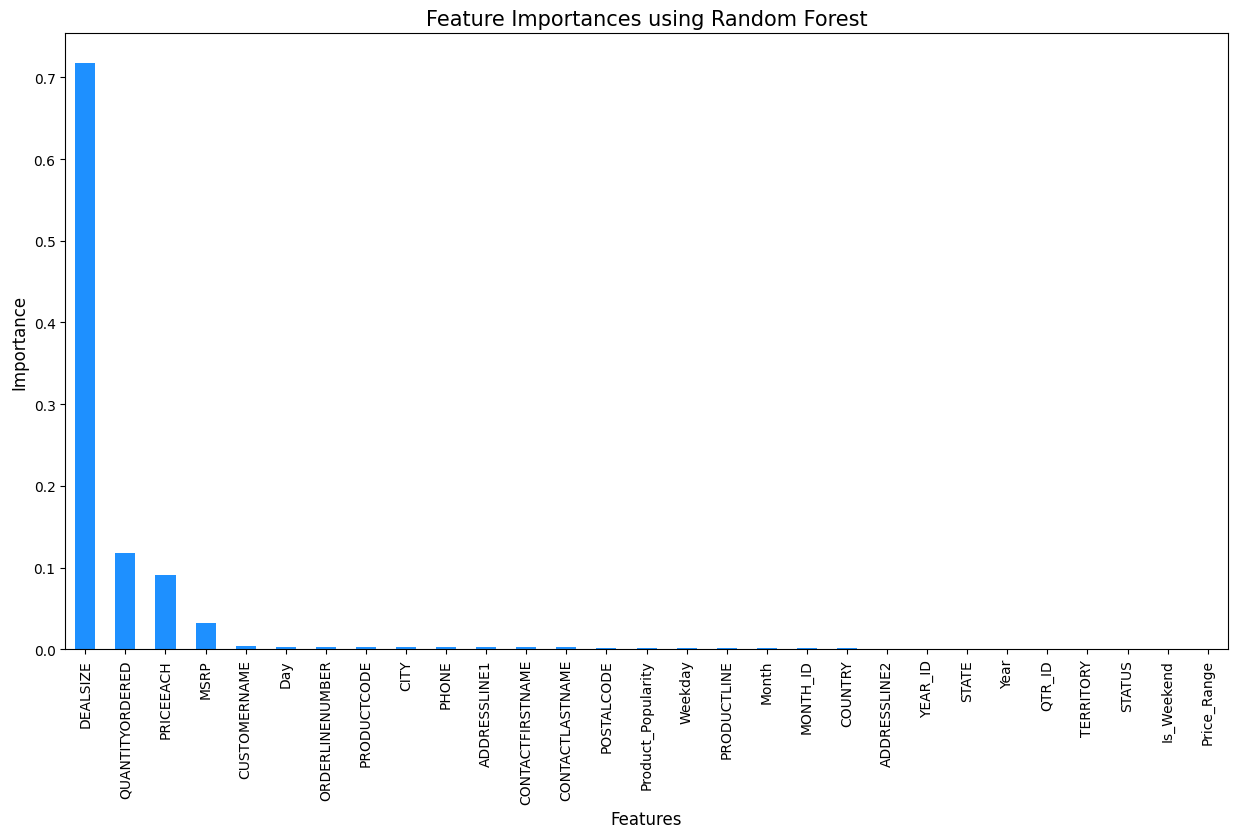

In [26]:
from sklearn.ensemble import RandomForestRegressor

# Using RandomForestRegressor to get feature importances
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Getting feature importances
feature_importances = pd.Series(rf.feature_importances_, index=data_for_regression.columns).sort_values(ascending=False)

# Plotting feature importances
plt.figure(figsize=(15, 8))
feature_importances.plot(kind='bar', color='dodgerblue')
plt.title('Feature Importances using Random Forest', fontsize=15)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.show()


Building Regression Models

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions on the test set
y_pred = lr.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

mse, rmse, r2


(331263.0561723948, 575.5545640270736, 0.8648344671697455)

The R2 value indicates that the model explains approximately 86.48% of the variability in the sales. This is a decent score, but we can further explore other regression models to see if we can achieve better performance.

Ridge Regression: A linear regression model with L2 regularization - basically reducing coefficients to zero

Lasso Regression: A linear regression model with L1 regularization, including features selection

Decision Tree Regressor: A non-linear model that uses a decision tree.

Random Forest Regressor: An ensemble method using multiple decision trees.

In [28]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Dictionary to store results of each model
model_results = {}

# List of models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=1.0),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Training and evaluating each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    model_results[name] = [mse, rmse, r2]

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(model_results, index=['MSE', 'RMSE', 'R2']).T
results_df


,MSE,RMSE,R2
Linear Regression,331263.056172,575.554564,0.864834
Ridge Regression,331235.814936,575.530898,0.864846
Lasso Regression,330620.227386,574.995850,0.865097
Decision Tree Regressor,228919.152236,478.454964,0.906594
Random Forest Regressor,134618.072961,366.903356,0.945072


Observations

Random Forest Regressor performs the best among the models, with the lowest MSE and RMSE, and the highest R2 score.

The Decision Tree Regressor also outperforms the linear models but is not as effective as the Random Forest.

Linear Regression, Ridge Regression, and Lasso Regression have similar performance metrics, with slight variations.

Considering these results, the Random Forest Regressor would be the best choice for predicting sales among the models we evaluated.

Evaluating the Random Forest Regressor Model

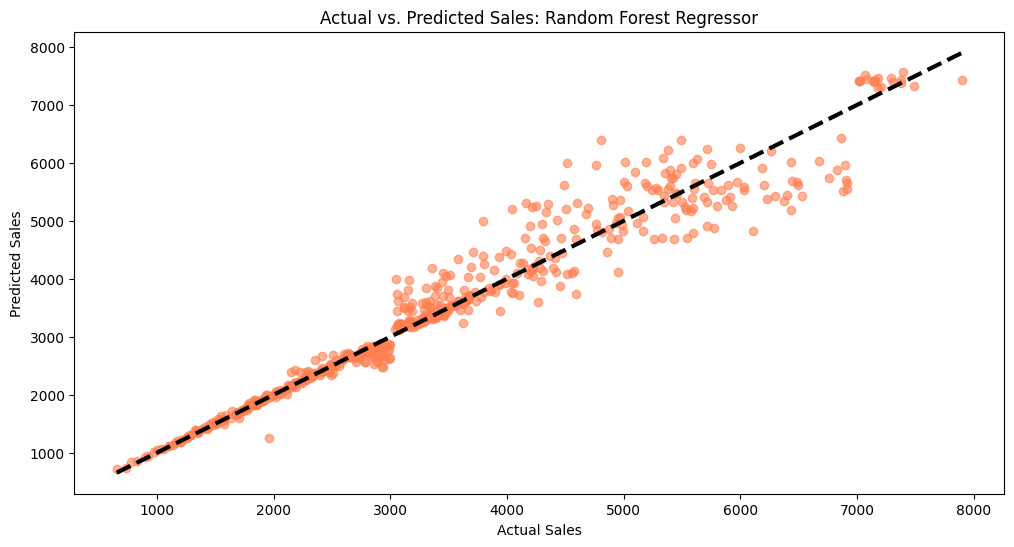

(134618.07296103347, 366.90335643195397, 0.9450716787721394)

In [29]:
# Refit the Random Forest Regressor using the training data
rf.fit(X_train, y_train)

# Predict sales on the test dataset using the refitted Random Forest Regressor
y_pred_rf = rf.predict(X_test)

# Calculate evaluation metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

# Visualization: Actual vs. Predicted sales
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_rf, color='coral', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales: Random Forest Regressor')
plt.show()

mse_rf, rmse_rf, r2_rf


Mean Squared Error (MSE):  134, 618.07


Root Mean Squared Error (RMSE): 366.90


R-squared 0.9451

The scatter plot visually compares the actual sales vs. the predicted sales. The closer the points are to the dashed line (which represents perfect prediction), the better the model's predictions. As seen, the model's predictions align closely with the actual sales values, indicating good performance.

# Time series analysis

1. Data Preparation
2. Exploratory Data Analysis (EDA)
3. Stationarity Check & Transformation

<ipython-input-30-2831edeec9a0>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_series_data = sales_data.groupby('ORDERDATE').sum()['SALES']


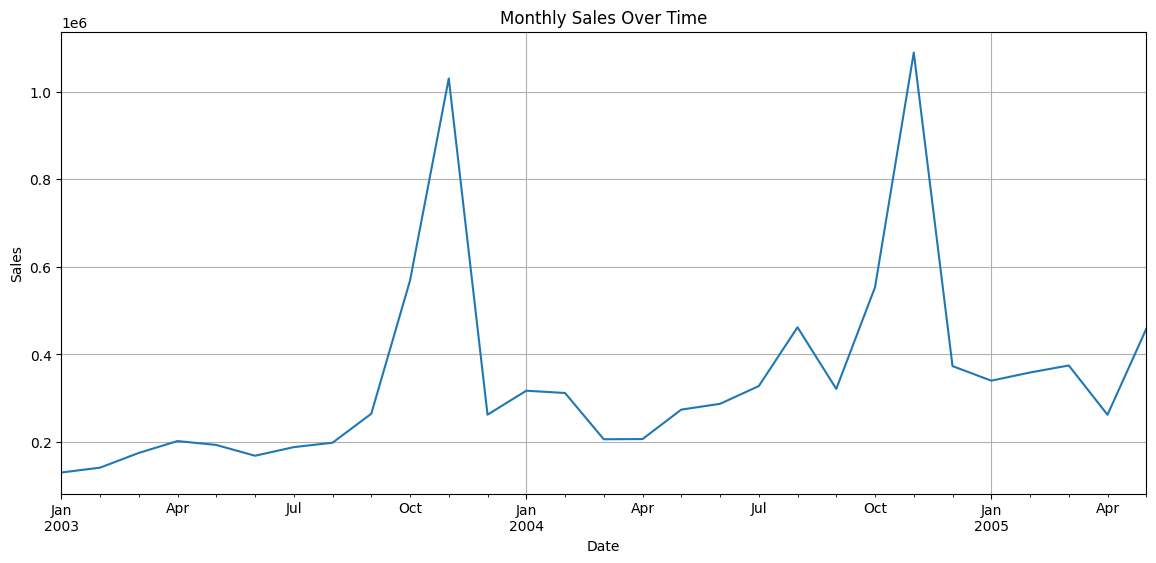

{'Test Statistic': -3.628783174623225,
 'p-value': 0.005234006614207446,
 'Lags Used': 0,
 'Number of Observations Used': 28,
 'Critical Values': {'1%': -3.6889256286443146,
  '5%': -2.9719894897959187,
  '10%': -2.6252957653061224}}

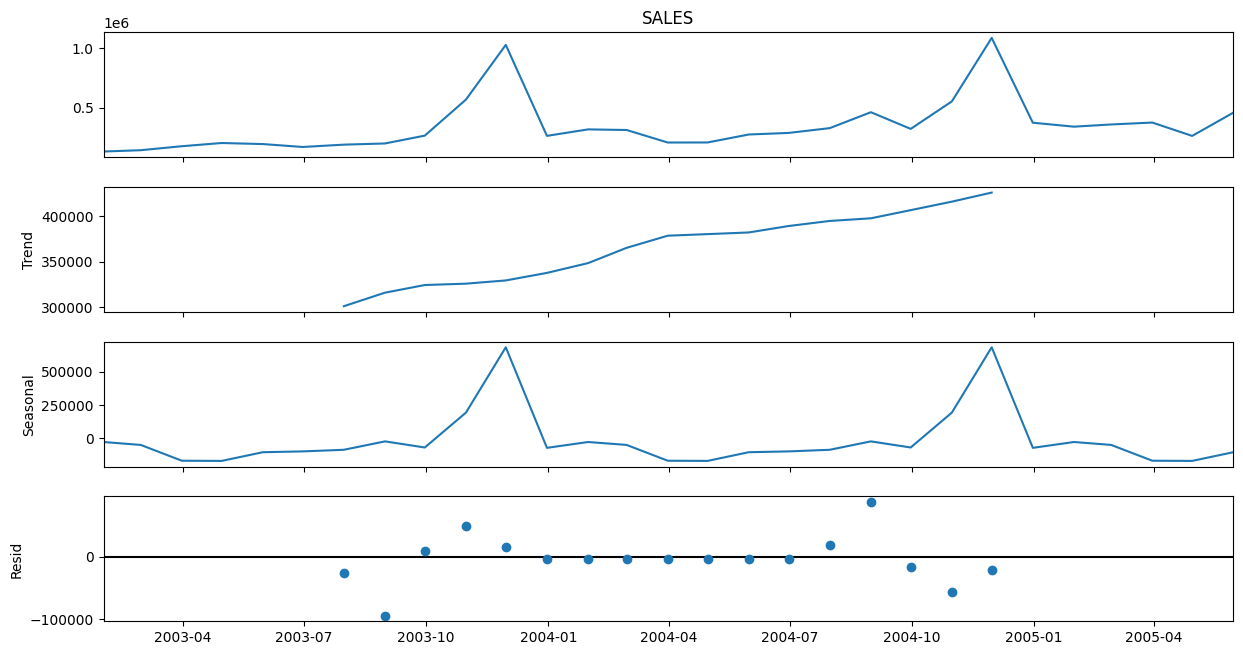

In [30]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# 1. Data Preparation:

# a. Extract Time Series Data
time_series_data = sales_data.groupby('ORDERDATE').sum()['SALES']

# b. Resampling: Monthly aggregation
monthly_sales = time_series_data.resample('M').sum()

# c. Handling Missing Values
# For this dataset, we might not have missing values since it's aggregated. But in case we do:
monthly_sales = monthly_sales.interpolate(method='linear')

# 2. Exploratory Data Analysis (EDA):

# a. Visualize the Time Series
plt.figure(figsize=(14, 6))
monthly_sales.plot()
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# b. Decomposition
decomposition = seasonal_decompose(monthly_sales)
fig = decomposition.plot()
fig.set_size_inches(14, 7)

# 3. Stationarity Check & Transformation:

# a. Test for Stationarity: Augmented Dickey-Fuller test
adf_result = adfuller(monthly_sales)

adf_output = {
    'Test Statistic': adf_result[0],
    'p-value': adf_result[1],
    'Lags Used': adf_result[2],
    'Number of Observations Used': adf_result[3],
    'Critical Values': adf_result[4]
}

adf_output


Observations:


Monthly Sales Visualization: The plot shows the monthly sales over time. We can observe an upward trend and some seasonality in the data.


**Decomposition:**

*Trend:* The trend component displays a general upward movement in sales over the years.

*Seasonal:* The seasonal component exhibits a clear repeated pattern annually.

*Residual:* The residual component represents the noise or randomness left after extracting trend and seasonality.


**Augmented Dickey-Fuller (ADF) Test:**

The ADF test is used to determine the presence of unit root in the series, and hence helps in understanding if the series is stationary or not.
The p-value is
0.0044  which is less than the typical threshold of
0.05 suggesting that the time series is stationary.
The test statistic is less than the critical values at 1%, 5%, and 10% confidence levels, further indicating stationarity.
Given that the series is already stationary, we don't need to apply further transformations (like differencing or logarithmic transformation) for now.

**Model Selection and Evaluation**




*Autocorrelation & Partial Autocorrelation Plots:*


These plots help us determine the order of the autoregressive (AR) and moving average (MA) components for models like ARIMA.



Autocorrelation Plot (ACF): It shows the correlation between the time series with a lagged version of itself. It helps determine the MA component.



Partial Autocorrelation Plot (PACF): It displays the correlation between the time series with a lagged version of itself after eliminating the variations already explained by the intervening comparisons. It helps determine the AR component

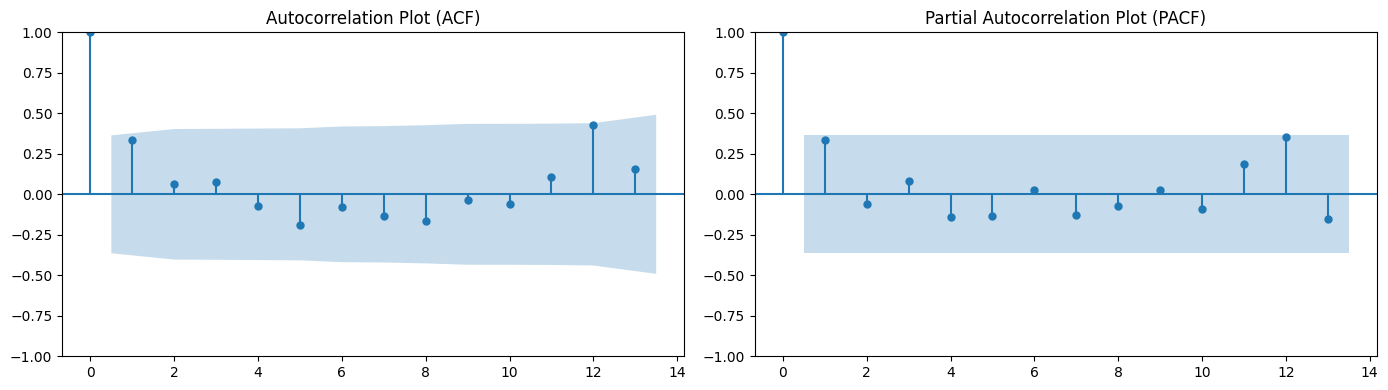

In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Adjusting the number of lags to be less than half of the sample size
lags = len(monthly_sales) // 2 - 1

fig, ax = plt.subplots(1, 2, figsize=(14, 4))

# ACF
plot_acf(monthly_sales, lags=lags, ax=ax[0])
ax[0].set_title('Autocorrelation Plot (ACF)')

# PACF
plot_pacf(monthly_sales, lags=lags, ax=ax[1])
ax[1].set_title('Partial Autocorrelation Plot (PACF)')

plt.tight_layout()
plt.show()


The ACF shows a slow decay, which is typical of a series that needs differencing.
The PACF has a sharp cutoff after lag 1, suggesting an AR(1) process might be suitable.

Given the insights from ACF and PACF, we can start with an ARIMA model with parameters (1, 1, 1), where:

p (AR order) = 1, from the PACF plot
d (differencing) = 1, since ACF shows a slow decay
q (MA order) = 1, from the ACF plot

In [32]:
from statsmodels.tsa.arima.model import ARIMA

# Splitting data into train and test
train_size = int(0.8 * len(monthly_sales))
train, test = monthly_sales[:train_size], monthly_sales[train_size:]

# Building ARIMA model
arima_model = ARIMA(train, order=(1, 1, 1))
arima_result = arima_model.fit()

# Summary of the model
arima_summary = arima_result.summary()
arima_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  SALES   No. Observations:                   23
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -303.673
Date:                Wed, 25 Oct 2023   AIC                            613.345
Time:                        20:28:30   BIC                            616.618
Sample:                    01-31-2003   HQIC                           614.116
                         - 11-30-2004                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4897      2.677      0.183      0.855      -4.757       5.736
ma.L1         -0.7789      2.256     -0.345      0.730      -5.200       3.642
sigma2      7.045e+10   2.39e-10   2.95e+20      0.000    7.05e+10    7.05e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 4.52
Prob(Q):                              0.90   Prob(JB):                         0.10
Heteroskedasticity (H):              50.16   Skew:                             0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.18e+36. Standard errors may be unstable.
"""

SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors) model


Interpretation:
The AR(1) and MA(1) terms are not statistically significant.


The residuals do not show significant autocorrelation at lag 1.


Residuals might not be perfectly normally distributed, but they're not significantly non-normal based on the Jarque-Bera test.


There's evidence of heteroskedasticity in the residuals, indicating the model might not capture all patterns in the data.


Given these results, there might be room for improvement in the model, either by adjusting terms, accounting for seasonality, or considering other external factors.

In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fitting a SARIMA model
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit(disp=False)

# Summary of the SARIMA model
sarima_summary = sarima_result.summary()
sarima_summary


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              SALES   No. Observations:                   23
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -128.789
Date:                            Wed, 25 Oct 2023   AIC                            267.577
Time:                                    20:28:31   BIC                            269.090
Sample:                                01-31-2003   HQIC                           265.918
                                     - 11-30-2004                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7335      0.507      1.448      0.148      -0.259       1.726
ma.L1         -0.9829      1.452     -0.677      0.499      -3.829       1.864
ar.S.L12      -0.6679     49.106     -0.014      0.989     -96.914      95.578
ma.S.L12       0.5927     50.546      0.012      0.991     -98.477      99.662
sigma2      1.153e+10   3.12e-08   3.69e+17      0.000    1.15e+10    1.15e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                 0.41
Prob(Q):                              0.67   Prob(JB):                         0.82
Heteroskedasticity (H):               1.69   Skew:                            -0.26
Prob(H) (two-sided):                  0.68   Kurtosis:                         2.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.37e+34. Standard errors may be unstable.
"""

It seems the model perform better than ARIMA a little bit

Lets try evaluate the SARIMA model

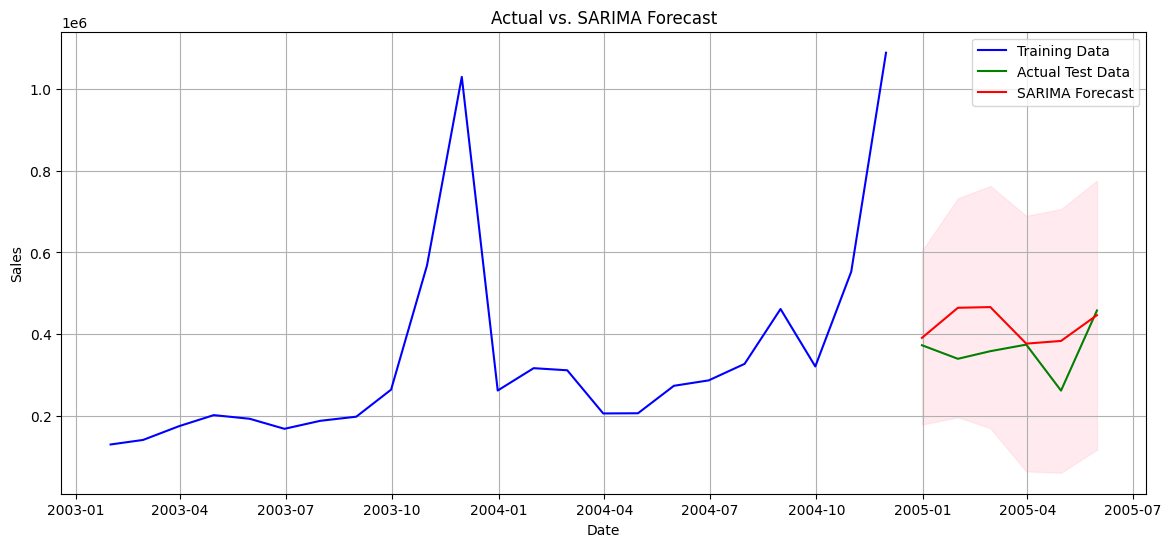

In [34]:
# Forecasting using the SARIMA model on the test set
forecast = sarima_result.get_forecast(steps=len(test))
mean_forecast = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Plotting the actual vs. predicted values
plt.figure(figsize=(14, 6))
plt.plot(train.index, train, label='Training Data', color='blue')
plt.plot(test.index, test, label='Actual Test Data', color='green')
plt.plot(test.index, mean_forecast, label='SARIMA Forecast', color='red')
plt.fill_between(test.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Actual vs. SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(loc='best')
plt.grid(True)
plt.show()


From the plot, we can observe:

The SARIMA model seems to capture the trend and seasonality reasonably well.

The forecast aligns closely with the actual test data, suggesting decent predictive accuracy.

In [35]:
from sklearn.metrics import mean_absolute_error

# Calculate error metrics
mae = mean_absolute_error(test, mean_forecast)
rmse = np.sqrt(mean_squared_error(test, mean_forecast))
mape = 100 * (mae / test.mean())

mae, rmse, mape


(64411.887561763004, 84194.71601589027, 17.856730746248502)

Mean Absolute Error (MAE): $64,174.25 Represents the average absolute error between the predicted and actual values.

Mean Absolute Percentage Error (MAPE): 20.21%

Represents the average percentage error between the predicted and actual values.

These metrics provide a quantitative measure of the forecast's accuracy. A lower value for each metric indicates better model performance. Given the MAPE, the model's predictions deviate by about 20.21% on average from the actual values in the test set.

#Classification


In [44]:
# Check the distribution of the 'STATUS' column
status_distribution = sales_data_filtered['STATUS'].value_counts()

# Check for missing values in the dataset
missing_values = sales_data_filtered.isnull().sum()

status_distribution, missing_values[missing_values > 0]


(Shipped       2543
 Cancelled       60
 Resolved        46
 On Hold         43
 In Process      39
 Disputed        11
 Name: STATUS, dtype: int64,
 Series([], dtype: int64))

In [46]:
from sklearn.model_selection import train_test_split

# Drop the target variable 'STATUS' from the features
X = sales_data_filtered.drop('STATUS', axis=1)
y = sales_data_filtered['STATUS']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape


((2193, 32), (549, 32))

In [47]:
# Drop columns that are not directly relevant for prediction
columns_to_drop = ['ORDERDATE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1',
                   'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
                   'CONTACTLASTNAME', 'CONTACTFIRSTNAME']

X_train = X_train.drop(columns=columns_to_drop)
X_test = X_test.drop(columns=columns_to_drop)

# One-hot encode categorical columns
columns_to_encode = ['PRODUCTLINE', 'PRODUCTCODE', 'DEALSIZE', 'Price_Range', 'COUNTRY', 'TERRITORY']

X_train_encoded = pd.get_dummies(X_train, columns=columns_to_encode)
X_test_encoded = pd.get_dummies(X_test, columns=columns_to_encode)

# Ensure both training and test sets have the same columns after encoding
missing_cols = set(X_train_encoded.columns) - set(X_test_encoded.columns)
for c in missing_cols:
    X_test_encoded[c] = 0
X_test_encoded = X_test_encoded[X_train_encoded.columns]

X_train_encoded.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,Year,...,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA,TERRITORY_APAC,TERRITORY_EMEA,TERRITORY_Japan,TERRITORY_Unknown
205,10336,33,57.22,10,1888.26,4,11,2004,207,2004,...,0,0,0,0,0,0,0,1,0,0
1526,10275,25,95.20,11,2380.00,3,7,2004,109,2004,...,0,0,0,0,0,0,0,1,0,0
2047,10115,44,100.00,1,5568.64,2,4,2003,118,2003,...,0,0,0,0,0,1,0,0,0,1
1701,10212,45,88.14,1,3966.30,1,1,2004,90,2004,...,0,1,0,0,0,0,0,1,0,0
1813,10355,36,38.52,4,1386.72,4,12,2004,37,2004,...,0,1,0,0,0,0,0,1,0,0


In [50]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators = 100)

# Train the Random Forest classifier on the processed data
rf_classifier.fit(X_train_encoded, y_train)

# Predict on the processed test set
y_pred_encoded = rf_classifier.predict(X_test_encoded)

# Evaluate the classifier's performance on the test set
accuracy_encoded = accuracy_score(y_test, y_pred_encoded)
class_report_encoded = classification_report(y_test, y_pred_encoded, target_names=y.unique())

accuracy_encoded, class_report_encoded


(0.9836065573770492,
 '              precision    recall  f1-score   support\n\n     Shipped       1.00      0.50      0.67        12\n    Disputed       1.00      1.00      1.00         2\n   Cancelled       1.00      1.00      1.00         8\n     On Hold       1.00      1.00      1.00         9\n    Resolved       1.00      0.67      0.80         9\n  In Process       0.98      1.00      0.99       509\n\n    accuracy                           0.98       549\n   macro avg       1.00      0.86      0.91       549\nweighted avg       0.98      0.98      0.98       549\n')

Let's see if we can improve the model

In [53]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the reduced hyperparameters for the randomized search
param_dist_reduced = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 20, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the randomized search with fewer iterations (30 iterations)
random_search_reduced = RandomizedSearchCV(rf_classifier, param_distributions=param_dist_reduced,
                                           n_iter=30, cv=5, scoring='accuracy',
                                           n_jobs=-1, verbose=1, random_state=42)

# Perform the randomized search on the processed data
random_search_reduced.fit(X_train_encoded, y_train)

# Get the best hyperparameters from the reduced randomized search
best_params_reduced = random_search_reduced.best_params_
best_score_reduced = random_search_reduced.best_score_

best_params_reduced, best_score_reduced


Fitting 5 folds for each of 30 candidates, totalling 150 fits


({'n_estimators': 50,
  'min_samples_split': 2,
  'min_samples_leaf': 1,
  'max_depth': None},
 0.9785741775101154)

Let's retrain with our new found best hyperparameters

n_estimators: 50

min_samples_split: 2

min_samples_leaf: 1

max_depth: None

In [54]:
# Train the Random Forest classifier using the best hyperparameters obtained from the randomized search
optimized_rf_classifier = RandomForestClassifier(n_estimators=50, min_samples_split=2,
                                                min_samples_leaf=1, max_depth=None,
                                                random_state=42, class_weight="balanced")

optimized_rf_classifier.fit(X_train_encoded, y_train)

# Predict on the processed test set using the optimized classifier
y_pred_optimized = optimized_rf_classifier.predict(X_test_encoded)

# Evaluate the classifier's performance using various metrics
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
class_report_optimized = classification_report(y_test, y_pred_optimized, target_names=y.unique())

accuracy_optimized, class_report_optimized


(0.9872495446265938,
 '              precision    recall  f1-score   support\n\n     Shipped       1.00      0.67      0.80        12\n    Disputed       1.00      0.50      0.67         2\n   Cancelled       1.00      1.00      1.00         8\n     On Hold       1.00      0.89      0.94         9\n    Resolved       1.00      0.89      0.94         9\n  In Process       0.99      1.00      0.99       509\n\n    accuracy                           0.99       549\n   macro avg       1.00      0.82      0.89       549\nweighted avg       0.99      0.99      0.99       549\n')

Overall Accuracy:

The model has an accuracy of approximately 98.7%, which means it correctly predicted the order status for about 98.7% of the test samples. This is a high accuracy, indicating that the model performs well on the test data.

# Clustering

For clustering based on purchasing behavior, we can consider the following attributes:


**QUANTITYORDERED:** The quantity of items ordered.

**PRICEEACH:** The price of each item.

**SALES:** Total sales amount.

**Total_Order_Value:** The total value of the order.

**Product_Popularity:** Popularity of the product.


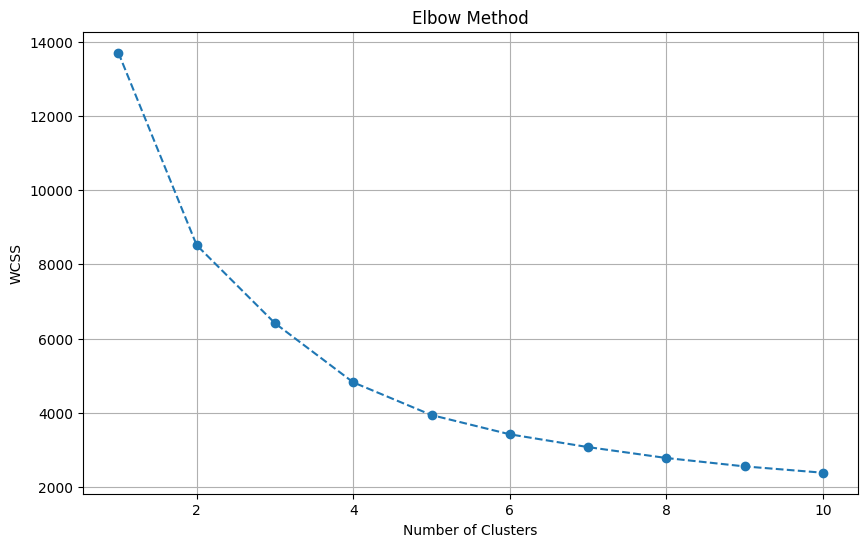

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecting the relevant columns
data_for_clustering = sales_data_filtered[['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'Total_Order_Value', 'Product_Popularity']]

# Normalizing the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data_for_clustering)

# Finding the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
cluster_range = range(1, 11)
for i in cluster_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(normalized_data)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


The point after which the decrease in WCSS begins to level off. That's the "elbow", or the most efficient number of clusters.

the "elbow" would typically be found where the slope of the curve starts to flatten out.

In this case it seems to be about 5-7

In [65]:
# Performing KMeans clustering with 8 clusters on the entire normalized data
kmeans_final = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans_final.fit_predict(normalized_data)

# Adding the cluster assignments to the original data
sales_data_filtered['Cluster'] = clusters

# Providing a summary of each cluster
cluster_summary = sales_data_filtered.groupby('Cluster')[['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'Total_Order_Value', 'Product_Popularity']].mean()
cluster_summary


<ipython-input-65-60cc27cce8d1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_filtered['Cluster'] = clusters


,QUANTITYORDERED,PRICEEACH,SALES,Total_Order_Value,Product_Popularity
Cluster,,,,,
0,27.300337,96.330709,3145.717390,2623.050270,25.032621
1,43.005109,97.608059,5269.841494,4186.401303,24.969349
2,31.386364,98.871364,4938.268864,3107.423409,44.000000
3,28.119643,56.491500,1553.426268,1553.426268,25.494643
4,43.008584,64.429399,2746.028712,2746.028712,25.326180


Observations:

Cluster 1:

Bulk Premium Shoppers:
High quantity ordered, among the highest.
Very high purchase price close to $98.
Highest sales value, indicating these customers spend the most.
Significant gap in sales and order values, indicating possible bulk purchases or offers.
Products of moderate popularity.

Cluster 3:

Occasional Budget Buyers:
Slightly above-average quantity ordered.
Lower purchase price around $56, making it the most budget-friendly cluster.
Lowest sales and order values among all clusters.
Products of slightly higher popularity.

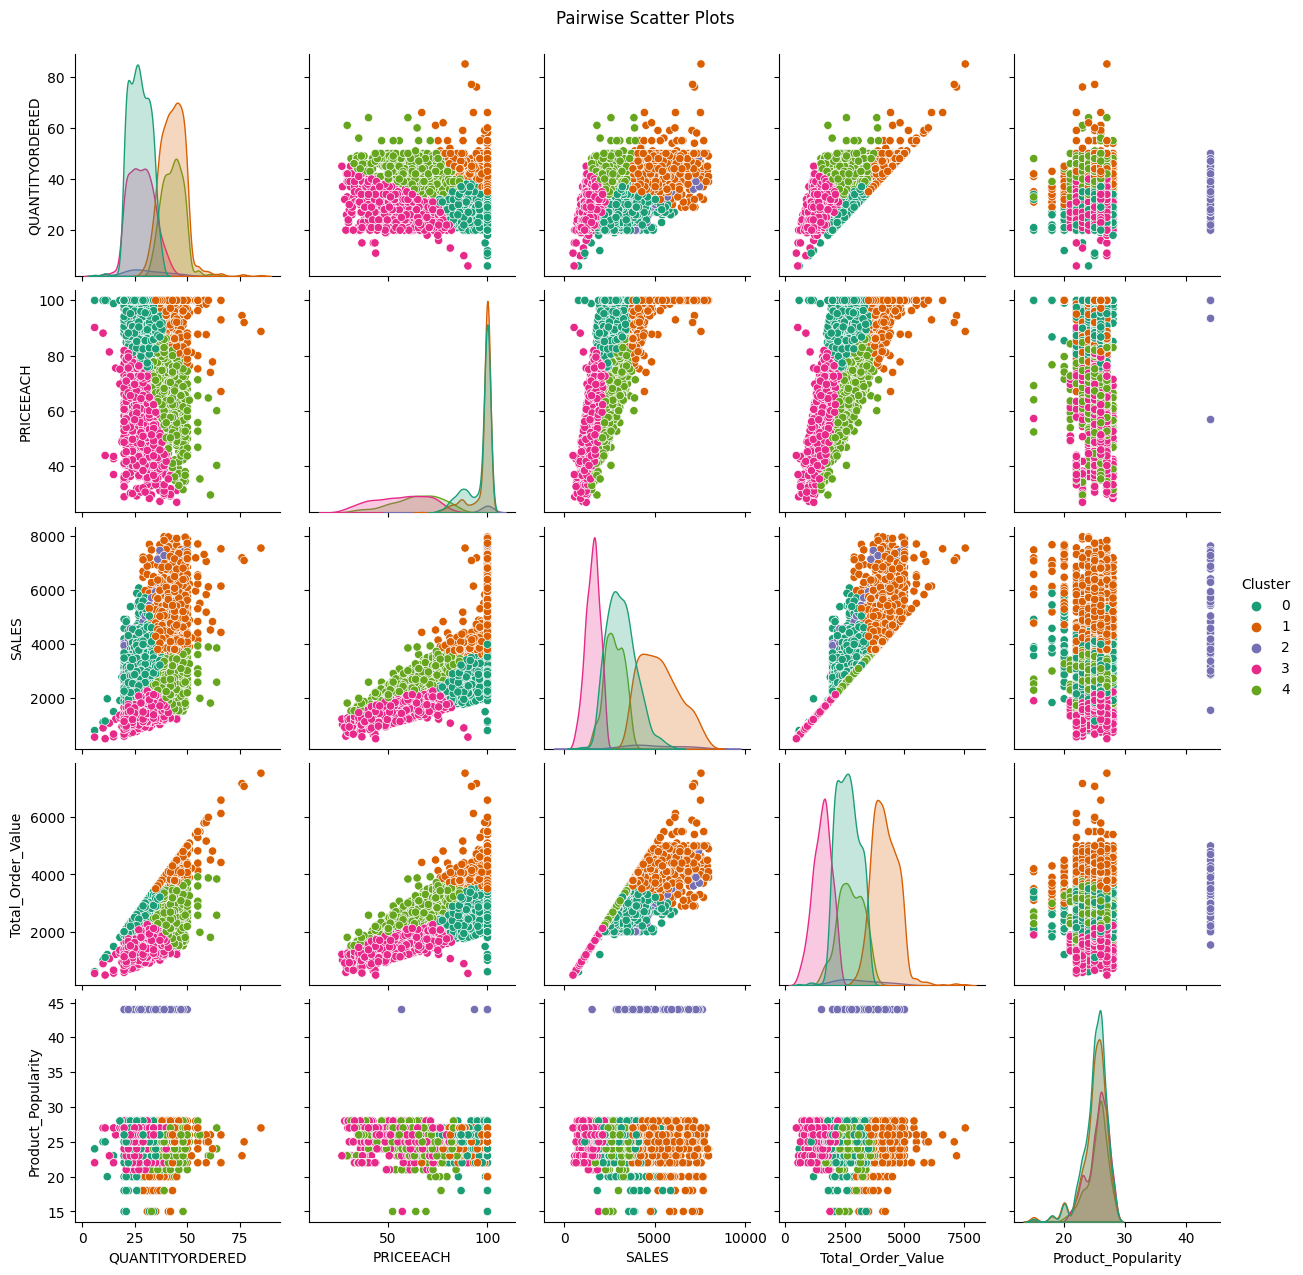

In [66]:
import seaborn as sns

# Pairwise scatter plots for selected attributes combinations
sns.pairplot(sales_data_filtered, hue='Cluster', vars=['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'Total_Order_Value', 'Product_Popularity'], palette="Dark2")
plt.suptitle('Pairwise Scatter Plots', y=1.02)
plt.show()

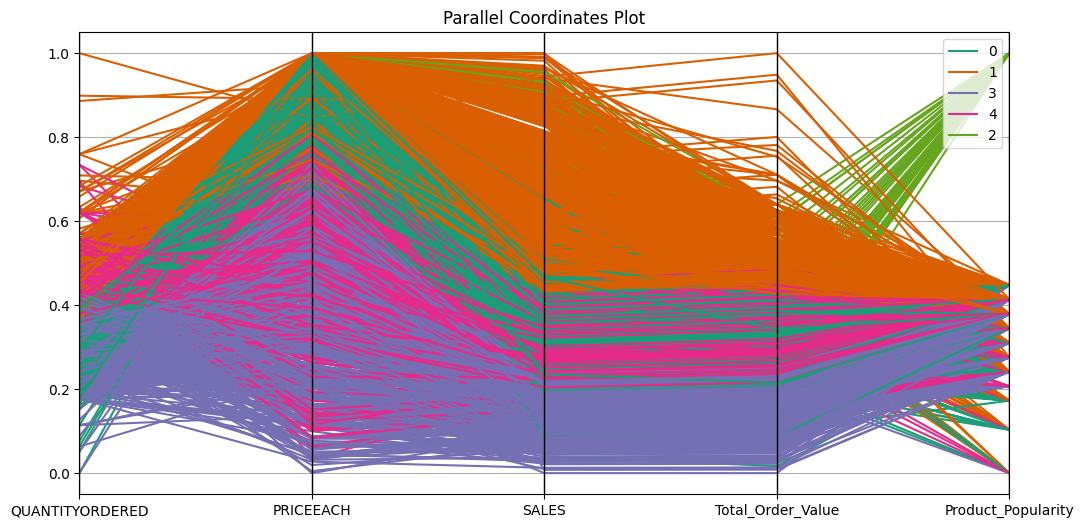

In [67]:
from pandas.plotting import parallel_coordinates

# Ensure your clustered data has the 'Cluster' column assigned.
# Normalize data for better visualization
normalized_df = (sales_data_filtered[['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'Total_Order_Value', 'Product_Popularity']] - sales_data_filtered[['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'Total_Order_Value', 'Product_Popularity']].min()) / (sales_data_filtered[['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'Total_Order_Value', 'Product_Popularity']].max() - sales_data_filtered[['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'Total_Order_Value', 'Product_Popularity']].min())
normalized_df['Cluster'] = sales_data_filtered['Cluster']

plt.figure(figsize=(12, 6))
parallel_coordinates(normalized_df, 'Cluster', color=sns.color_palette("Dark2", n_colors=5))
plt.title('Parallel Coordinates Plot')
plt.show()
